In [1]:
import math as math
import numpy as np
import random
import matplotlib.pyplot as plt
import operator

In [2]:
#Задаем матрицу переходных вероятностей

def transition_matrix():
    matrix = np.array([[0.95, 0.05], [0.1, 0.9]])
    return(matrix)


#Матрица наблюдений

def emission_matrix():
    matrix = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])
    return(matrix)


#Матрица начального распределения

def beginning_distribution_matrix():
    matrix = np.array([1/3, 2/3])
    return(matrix)

In [3]:
#Моделирование Скрытого марковского процесса

def HMM(transition_matrix, emission_matrix, beginning_distribution_matrix, L):
    state_path = np.zeros(L)
    path = np.zeros(L)
    state = np.random.choice(2, p=[1/3, 2/3])
    
    for i in range(L):
        if state == 0:
            path[i] = (random.randint(0, 5))
            state_path[i] = 0
            state = np.random.choice([0, 1], p=[0.95, 0.05])
        else:
            path[i] = (np.random.choice(6, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5]))
            state_path[i] = 1
            state = np.random.choice([0, 1], p=[0.1, 0.9])
    return(path, state_path)

In [4]:
def Viterbi(transition_matrix, emission_matrix, beginning_distribution_matrix, rolls):
   
    N = len(transition_matrix)
    L = len(rolls)
    vij = np.zeros((N, L))
    backlinks = np.zeros((N, L))
    
    #viterbi
    for i in range(L):
        if i == 0:
            vij[:, i] = np.log(beginning_distribution_matrix) + np.log(emission_matrix[:, int(rolls[i])])
        else:
            for j in range(N):
                calc = np.log(emission_matrix[j, int(rolls[i])]) + (vij[:, i-1]) + np.log(transition_matrix[:, j])
                vij[j,i] = max(calc)
                backlinks[j,i] = np.argmax(calc)
    #print(vij)
    #print(backlinks)
    
    #backward
    state_path = np.zeros(L)
    state_path[-1] = np.argmax(vij[:, -1])
    for i in range(L-2, -1, -1):
        state_path[i] = backlinks[int(state_path[i+1]),i+1]
    
    
    return state_path

In [5]:
#Forward algorithm

def Forward(transition_matrix, emission_matrix, beginning_distribution_matrix, rolls):
    
    N = len(transition_matrix)
    L = len(rolls) 
    fij = np.zeros((N, L))
    
    
    #forward
    for i in range(L):
        if i == 0 :
            fij[:, i] = beginning_distribution_matrix * emission_matrix[:, int(rolls[i])]
        else:
            for j in range(N):
                fij[j, i] = emission_matrix[j, int(rolls[i])] * sum(fij[:, i-1] * transition_matrix[:, j])
            
    result = sum(fij[:, -1]) 
    
    return(result, fij)


def Forward_with_norm(transition_matrix, emission_matrix, beginning_distribution_matrix, rolls):
    
    N = len(transition_matrix)
    L = len(rolls) 
    fij = np.zeros((N, L))
    
    
    #forward
    n_vec = np.zeros(L)
    for i in range(L):
        if i == 0 :
            fij[:, i] = beginning_distribution_matrix * emission_matrix[:, int(rolls[i])]
            n_vec[i] = max(fij[:, i])
            fij[:, i] = fij[:, i]/n_vec[i]
        else:
            for j in range(N):
                fij[j, i] = emission_matrix[j, int(rolls[i])] * sum(fij[:, i-1] * transition_matrix[:, j])
            n_vec[i] = max(fij[:, i])
            fij[:, i] = fij[:, i]/n_vec[i]
            
    result = sum(fij[:, -1]) 
    
    
    return(n_vec, result, fij)

In [6]:
#Backward algorithm

def Backward(transition_matrix, emission_matrix, beginning_distribution_matrix, rolls):
    
    N = len(transition_matrix)
    L = len(rolls) 
    bij = np.zeros((N, L))
    
    
    #backward
    for i in range(L-1, -1, -1):
        if i == L-1:
            bij[:, i] = np.array([1, 1])
        else:
            for j in range(N):
                bij[j, i] = sum(bij[:, i+1] * transition_matrix[j] * emission_matrix[:, int(rolls[i+1])])

    result = sum(bij[:, 0] * beginning_distribution_matrix * emission_matrix[:, int(rolls[0])])
    
    
    return(result, bij)


def Backward_with_norm(transition_matrix, emission_matrix, beginning_distribution_matrix, rolls):
    
    N = len(transition_matrix)
    L = len(rolls) 
    bij = np.zeros((N, L))
    
    
    #backward
    n_vec = np.zeros(L)
    for i in range(L-1, -1, -1):
        if i == L-1:
            bij[:, i] = np.array([1, 1])
            n_vec[i] = 1
            bij[:, i] = bij[:, i]/n_vec[i]
        else:
            for j in range(N):
                bij[j, i] = sum(bij[:, i+1] * transition_matrix[j] * emission_matrix[:, int(rolls[i+1])])
            n_vec[i] = max(bij[:, i])
            bij[:, i] = bij[:, i]/n_vec[i]

    result = sum(bij[:, 0] * beginning_distribution_matrix * emission_matrix[:, int(rolls[0])])
    
    
    return(n_vec, result, bij)

In [7]:
#Aposterior algorithm

def Aposterior(fij, bij, fresult, nf_vec, nb_vec):
    L = len(fij)
    result = np.zeros(L)
    for i in range(L):
        result[i] = np.log(fij[i]) + sum(np.log(nf_vec[:i+1])) + np.log(bij[i]) + sum(np.log(nb_vec[i:])) - (np.log(fresult) + sum(np.log(nf_vec)))
    return np.exp(result)


In [8]:
#Моделируем СММ и путь Витерби

rolls, states = HMM(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), 1000)
viterbi_path = Viterbi(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), rolls)

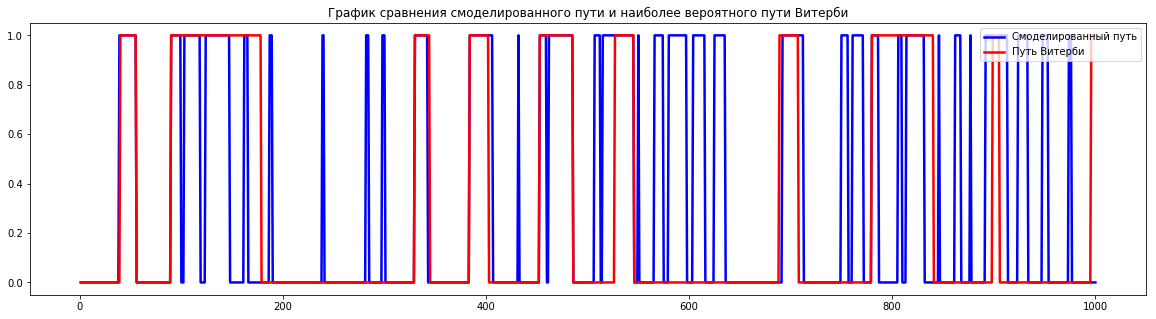

Процент совпадений: 77.00 


In [9]:
count = 0
for i in range(len(rolls)):
    if states[i] == viterbi_path[i]:
        count+=1
percent = count/len(rolls) * 100
        
x = np.linspace(1, 1000, 1000)
fig, ax = plt.subplots()
ax.plot(x, states, color="blue", lw = 2.5, label = 'Смоделированный путь')
ax.plot(x, viterbi_path, color="red", lw = 2.5, label = 'Путь Витерби')
ax.set_title('График сравнения смоделированного пути и наиболее вероятного пути Витерби')
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()
print("Процент совпадений: %.2f " % percent)

In [10]:
fresult_1, fij_1 = Forward(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), rolls)
bresult_1, bij_1 = Backward(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), rolls)
nf_vec, fresult, fij = Forward_with_norm(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), rolls)
nb_vec, bresult, bij = Backward_with_norm(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), rolls)

print('Сравнение результатов прямого и обратного хода (без нормировки) с помощью втроенных функций NumPy и Math:')
print('NumPy result: ', np.isclose(fresult_1, bresult_1))
print('Math result:  ', math.isclose(fresult_1, bresult_1))

print('\nСравнение результатов прямого и обратного хода (с нормировкой) с помощью втроенных функций NumPy и Math:')
print('NumPy result: ',np.isclose(sum(np.log(nf_vec)) + np.log(fresult), sum(np.log(nb_vec)) + np.log(bresult)))
print('Math result:  ',math.isclose(sum(np.log(nb_vec)) + np.log(bresult), sum(np.log(nf_vec)) + np.log(fresult)))

Сравнение результатов прямого и обратного хода (без нормировки) с помощью втроенных функций NumPy и Math:
NumPy result:  True
Math result:   True

Сравнение результатов прямого и обратного хода (с нормировкой) с помощью втроенных функций NumPy и Math:
NumPy result:  True
Math result:   True


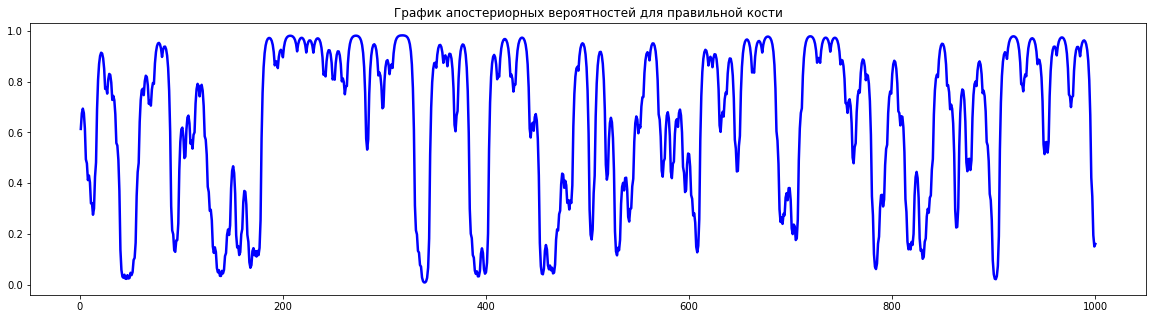

In [11]:
#Апостериарные вероятности

aposterior_result = Aposterior(fij[0], bij[0], fresult, nf_vec, nb_vec)
x = np.linspace(1, 1000, 1000)
fig, ax = plt.subplots()
ax.plot(x, aposterior_result, color="blue", lw = 2.5)
ax.set_title('График апостериорных вероятностей для правильной кости')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()